
Statistics for 'minutes' before filtering:
count    2.316370e+05
mean     9.398546e+03
std      4.461963e+06
min      0.000000e+00
25%      2.000000e+01
50%      4.000000e+01
75%      6.500000e+01
max      2.147484e+09
Name: minutes, dtype: float64


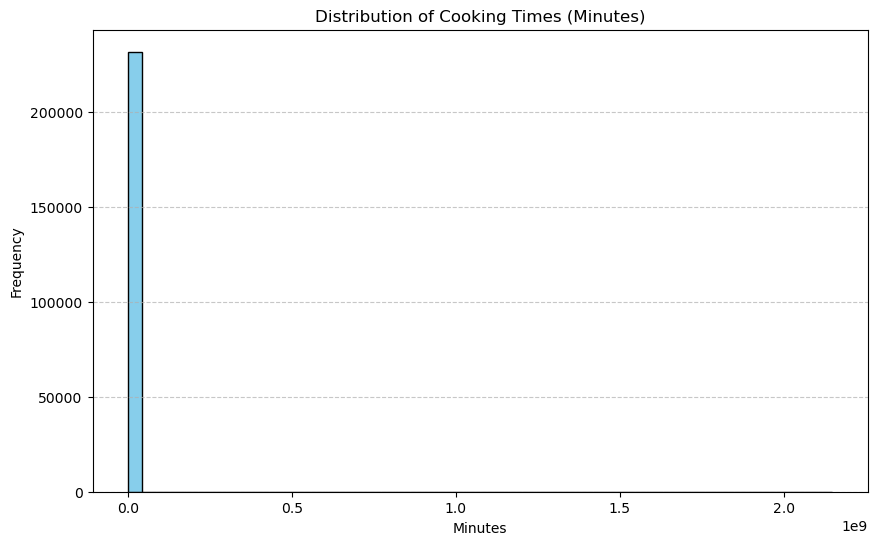

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast  # To safely parse the 'nutrition' strings into lists

raw_recipes = pd.read_csv("RAW_recipes.csv")
columns_to_keep = ["name", "id", "minutes", "nutrition"]
raw_recipes = raw_recipes[columns_to_keep]
raw_recipes["calories"] = raw_recipes["nutrition"].apply(lambda x: ast.literal_eval(x)[0] if pd.notna(x) else None)
raw_recipes = raw_recipes.drop(columns=["nutrition"])

print("\nStatistics for 'minutes' before filtering:")
print(raw_recipes["minutes"].describe())

plt.figure(figsize=(10, 6))
plt.hist(raw_recipes["minutes"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Cooking Times (Minutes)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [2]:
print(raw_recipes[:5])

                                         name      id  minutes  calories
0  arriba   baked winter squash mexican style  137739       55      51.5
1            a bit different  breakfast pizza   31490       30     173.4
2                   all in the kitchen  chili  112140      130     269.8
3                          alouette  potatoes   59389       45     368.1
4          amish  tomato ketchup  for canning   44061      190     352.9


Number of rows dropped: 11064

Statistics for 'minutes' after filtering:
count    220573.000000
mean         49.419915
std          46.572964
min           1.000000
25%          20.000000
50%          35.000000
75%          60.000000
max         300.000000
Name: minutes, dtype: float64


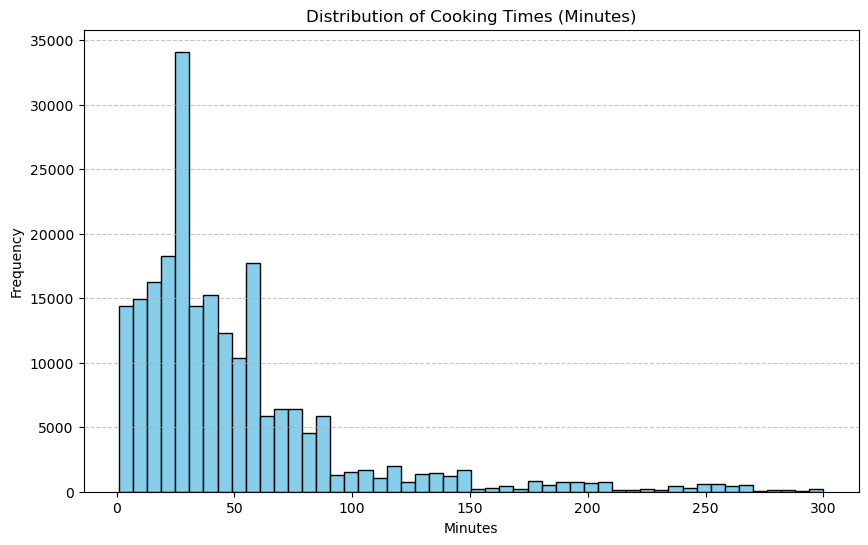


Median cooking time (minutes): 35.0


In [3]:
# Filter out rows where "minutes" > 300
initial_count = len(raw_recipes)
raw_recipes_filtered_mins = raw_recipes[raw_recipes["minutes"] <= 300]
raw_recipes_filtered_mins = raw_recipes_filtered_mins[raw_recipes_filtered_mins["minutes"] > 0]
final_count = len(raw_recipes_filtered_mins)
rows_dropped = initial_count - final_count
print(f"Number of rows dropped: {rows_dropped}")

print("\nStatistics for 'minutes' after filtering:")
print(raw_recipes_filtered_mins["minutes"].describe())

plt.figure(figsize=(10, 6))
plt.hist(raw_recipes_filtered_mins["minutes"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Cooking Times (Minutes)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Find the median of the "minutes" column
median_minutes = raw_recipes_filtered_mins["minutes"].median()

# Filter recipes with "minutes" less than or equal to the median
quick_recipes = raw_recipes_filtered_mins[raw_recipes_filtered_mins["minutes"] <= median_minutes]
print(f"\nMedian cooking time (minutes): {median_minutes}")

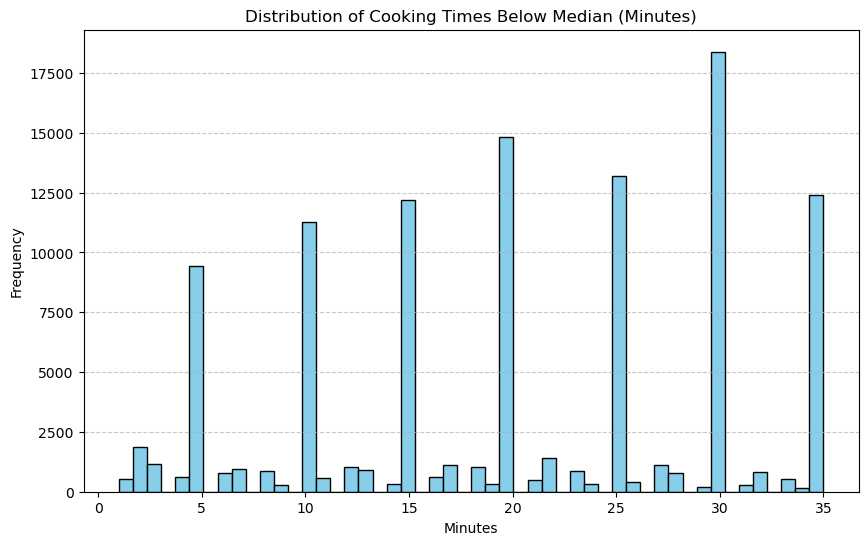

In [4]:
# Plot the distribution of the "minutes" variable
plt.figure(figsize=(10, 6))
plt.hist(quick_recipes["minutes"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Cooking Times Below Median (Minutes)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [5]:
print(len(quick_recipes))

112145


In [6]:
raw_interactions = pd.read_csv("RAW_interactions.csv")
columns_to_keep = ["user_id", "recipe_id", "rating"]
raw_interactions = raw_interactions[columns_to_keep]

# Filter out interactions where "recipe_id" is in "quick_recipes"
quick_recipe_ids = set(quick_recipes["id"])  # faster lookup
quick_interactions = raw_interactions[raw_interactions["recipe_id"].isin(quick_recipe_ids)]

print(quick_interactions.head())
print(f"\nNumber of interactions in raw_interactions: {len(raw_interactions)}")
print(f"\nNumber of interactions in quick_interactions: {len(quick_interactions)}")

   user_id  recipe_id  rating
2     8937      44394       4
3   126440      85009       5
4    57222      85009       5
5    52282     120345       4
6   124416     120345       0

Number of interactions in raw_interactions: 1132367

Number of interactions in quick_interactions: 536170



Statistics for 'calories' before filtering:
count    231637.000000
mean        473.942425
std        1189.711374
min           0.000000
25%         174.400000
50%         313.400000
75%         519.700000
max      434360.200000
Name: calories, dtype: float64


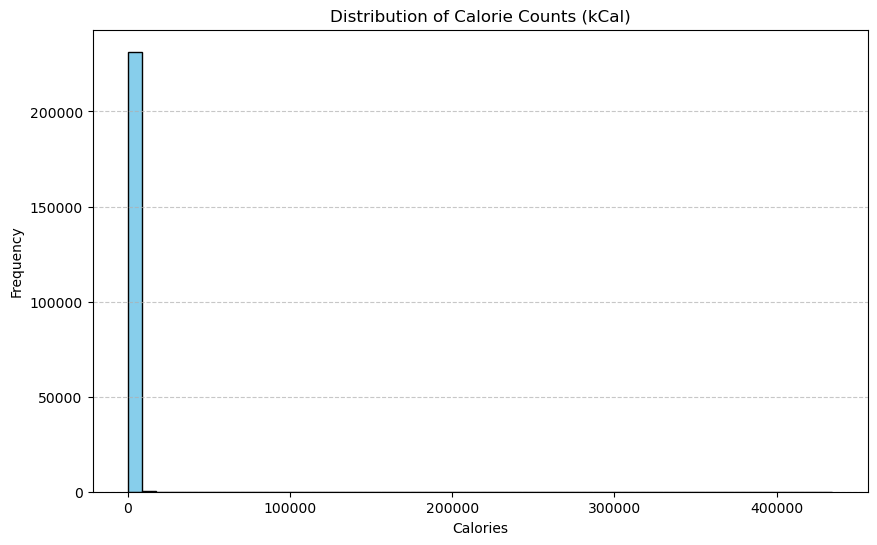

In [7]:
print("\nStatistics for 'calories' before filtering:")
print(raw_recipes["calories"].describe())

plt.figure(figsize=(10, 6))
plt.hist(raw_recipes["calories"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Calorie Counts (kCal)")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Number of rows dropped: 7326

Statistics for 'calories' after filtering:
count    224311.000000
mean        384.364623
std         307.524514
min          10.100000
25%         173.100000
50%         306.900000
75%         498.300000
max        1999.900000
Name: calories, dtype: float64


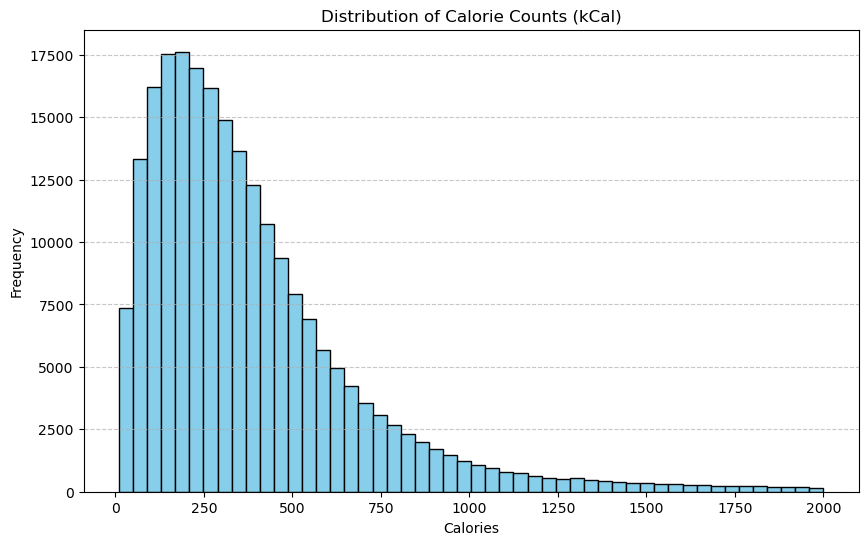


Median calorie count (kCal): 306.9


In [8]:
# Filter out rows where 10 < "calories" < 2000
initial_count = len(raw_recipes)
raw_recipes_filtered_cals = raw_recipes[raw_recipes["calories"] <= 2000]
raw_recipes_filtered_cals = raw_recipes_filtered_cals[raw_recipes_filtered_cals["calories"] > 10]
final_count = len(raw_recipes_filtered_cals)
rows_dropped = initial_count - final_count
print(f"Number of rows dropped: {rows_dropped}")

print("\nStatistics for 'calories' after filtering:")
print(raw_recipes_filtered_cals["calories"].describe())

plt.figure(figsize=(10, 6))
plt.hist(raw_recipes_filtered_cals["calories"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Calorie Counts (kCal)")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Find the median of the "calories" column
median_calories = raw_recipes_filtered_cals["calories"].median()

# Filter recipes with "calories" less than or equal to the median
low_cal_recipes = raw_recipes_filtered_cals[raw_recipes_filtered_cals["calories"] <= median_calories]
print(f"\nMedian calorie count (kCal): {median_calories}")

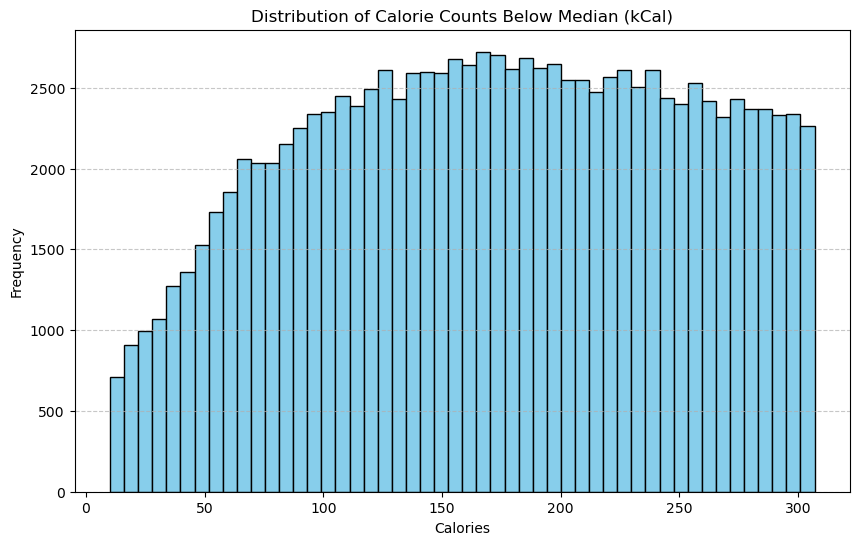

In [9]:
# Plot the distribution of the "calories" variable
plt.figure(figsize=(10, 6))
plt.hist(low_cal_recipes["calories"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Calorie Counts Below Median (kCal)")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [10]:
print(len(low_cal_recipes))

112172


In [11]:
# Filter out interactions where "recipe_id" is in "quick_recipes"
low_cal_recipe_ids = set(low_cal_recipes["id"])  # faster lookup
low_cal_interactions = raw_interactions[raw_interactions["recipe_id"].isin(low_cal_recipe_ids)]

print(low_cal_interactions.head())
print(f"\nNumber of interactions in raw_interactions: {len(raw_interactions)}")
print(f"\nNumber of interactions in low_cal_interactions: {len(low_cal_interactions)}")

    user_id  recipe_id  rating
0     38094      40893       4
1   1293707      40893       5
2      8937      44394       4
20   202555     225241       5
21   353579     225241       5

Number of interactions in raw_interactions: 1132367

Number of interactions in low_cal_interactions: 549777


In [12]:
quick_recipes.to_csv("quick_recipes.csv", index=False)
quick_interactions.to_csv("quick_interactions.csv", index=False)
low_cal_recipes.to_csv("low_cal_recipes.csv", index=False)
low_cal_interactions.to_csv("low_cal_interactions.csv", index=False)